## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [92]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [93]:
df = pd.read_csv('ab_data.csv')

In [94]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [95]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [96]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [97]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [98]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


No its doesn't have any null values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [100]:
# Where treatment does not match with new_page or control does not match with old_page
i = df[((df['group']=='treatment') ==(df['landing_page']=='new_page')) == False].index

In [101]:
# Drop those rows
df2 = df.drop(i)

In [102]:
# Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [103]:
# Number of unique users in df2
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [104]:
# Number of duplicate rows
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [105]:
# Drop the row and keep the first row
df2.drop_duplicates(subset ='user_id',keep ='first',inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [110]:
# Prob of conversion regardless of the page
(df2.query('converted == 1').converted.count())/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [111]:
# Prob of conversion in control group
control_df = df2.query('group =="control"')
Pold = control_df['converted'].mean()
Pold

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [112]:
# Prob of conversion in treatment group
treatment_df = df2.query('group =="treatment"')
Pnew = treatment_df['converted'].mean()

In [113]:
Pnew 

0.11880806551510564

d. What is the probability that an individual received the new page?

In [114]:
# Prob of receiving new page
df2.query('landing_page == "new_page"').landing_page.count()/df2.shape[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

From the above results we cannot conclude that new treatment leads to more conversion. As per our analysis we can see that Pnew is smaller than P old. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

H0 = Pnew <= Pold
H1 = Pnew > Pold 

2. Assume under the null hypothesis,  𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  both have "true" success rates equal to the converted success rate regardless of page - that is  𝑝𝑛𝑒𝑤 and  𝑝𝑜𝑙𝑑  are equal. Furthermore, assume they are equal to the converted rate in ab_data.csv regardless of the page. 


Use a sample size for each page equal to the ones in ab_data.csv. 


Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null. 


Use the cells below to provide the necessary parts of this simulation. If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem. You can use Quiz 5 in the classroom to make sure you are on the right track.

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [115]:
P_new = treatment_df['converted'].mean()
P_new

0.11880806551510564

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [116]:
P_old = control_df['converted'].mean()
P_old

0.1203863045004612

c. What is $n_{new}$, the number of individuals in the treatment group?

In [117]:
n_new = treatment_df.shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [118]:
n_old = control_df.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted = np.random.binomial(1,P_new,n_new)
new_page_converted.mean()


0.11975087743445048

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.binomial(1,P_old,n_old)
old_page_converted.mean()

0.12090945385960324

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
 new_page_converted.mean() - old_page_converted.mean()


-0.0011585764251527547

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [44]:
p_diffs =[]
size = df2.shape[0]
for _ in range(10000):
    new_page_converted = np.random.binomial(1,P_new, n_new)
    old_page_converted = np.random.binomial(1,P_old, n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

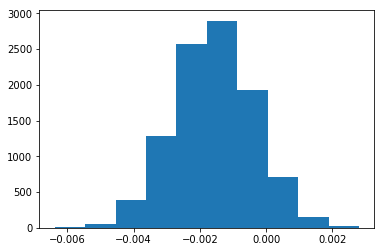

In [45]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

In [32]:
act_new_conversion = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()/n_new

In [33]:
act_old_conversion  = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()/n_old

In [34]:
obs_diff = act_new_conversion - act_old_conversion
obs_diff

-0.0015782389853555567

j. What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?

In [41]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

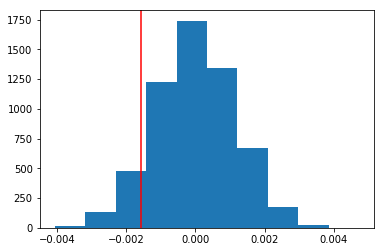

In [42]:
plt.hist(null_vals)
plt.axvline(x=obs_diff,color ='red')

In [43]:
(null_vals > obs_diff).mean()

0.91423641069887829

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

The value we computed in J is called P-value, which says the probability of finding the observed when null hypothesis is true.
Here P value is greater than 0.05 this means we fail to reject null hypothesis. That means old pages are better or equally performing well in conversion rates than new ones.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [119]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [120]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

P value somewhat matches to the above value and its larger than 0.05 so we failed to reject null hypothesis 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

For all the categorical variable we must use Logistic regression by adding appropriate dummy variables.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [121]:
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [122]:
df2['intercept'] = 1
logit_mod = sm.Logit(df2['converted'],df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 04 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        22:17:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [123]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [124]:
1/_

intercept    7.306593
ab_page      1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?


  

**Put your answer here.**
The p-value associated with logistic regression model is .190 and it is greater than .05 hence once again we failed to reject null hypotheses and unable to establish that landing page is statiscally significant conversion.And the null hypotheses is now there is no difference between the treatment and control group.Alternative hypotheses is that there is difference between between the treatment and control group.
New hypotheses are:
H0 : Pnew = Pold
H1 : Pnew != Pold

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

Since we are unable to find any factors that influence conversion, we may want to add few more variables. Adding too many variable may add a complexity to the model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [125]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [126]:
df3 =countries_df.merge(df2,on='user_id',how='left')
df3.head()

,user_id,country,timestamp,group,landing_page,converted,ab_page,intercept
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [127]:
df3['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [128]:
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3 = df3.drop(df3['CA'])

In [129]:
df3['intercept'] = 1
log_mod1 = sm.Logit(df3['converted'],df3[['intercept','ab_page','US','UK']])
results = log_mod1.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            3
Date:                Sat, 04 May 2019   Pseudo R-squ.:               2.324e-05
Time:                        22:18:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.129      -0.012       0.093
UK             0.0507      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

In [130]:
np.exp(results.params)

intercept    0.131332
ab_page      0.985168
US           1.041605
UK           1.051961
dtype: float64

In [131]:
1/_

intercept    7.614303
ab_page      1.015056
US           0.960057
UK           0.950606
dtype: float64

Intrepretation from result :
 1. With every unit of ab_page decreases, conversion will be 1.01% more likely to happen,holding all the other variable constant.
 2. With every unit of US increases,conversion will be 1.04% more likely to happen,holding all the other variable constant.
 3. With every unit of UK increases,conversion will be 1.05% more likely to happen,holding all the other variable constant.
 All the p value associated are greater than 0.05 hence we again fail to reject null hypotheses stating that none of the factore influences conversion rate.
 We will check further for interactions of variables.
 


In [132]:
df3['UK_ab_page'] = df3['ab_page']* df3['UK']
df3['US_ab_page'] = df3['ab_page']* df3['US']

In [136]:
log_mod3 = sm.Logit(df3['converted'],df3[['intercept','ab_page','UK_ab_page','US_ab_page','UK','US']])
results3 = log_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290576
Method:                           MLE   Df Model:                            5
Date:                Sat, 04 May 2019   Pseudo R-squ.:               3.481e-05
Time:                        22:25:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1921
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK             0.0118      0.040      0.297      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
==============================================================================
"""

In [140]:
np.exp(results3.params)

intercept     0.134794
ab_page       0.934776
UK_ab_page    1.081394
US_ab_page    1.048013
UK            1.011885
US            1.017682
dtype: float64

In [141]:
1/_

intercept     7.418713
ab_page       1.069775
UK_ab_page    0.924732
US_ab_page    0.954187
UK            0.988254
US            0.982625
dtype: float64

Statistical Intrepretation :
 1. With every unit of ab_page decreases, conversion will be 1.06% more likely to happen,holding all the other variable constant.
 2. With every unit of US increases,conversion will be 1.01% more likely to happen,holding all the other variable constant.
 3. With every unit of UK increases,conversion will be 1.01% more likely to happen,holding all the other variable constant.
 4. With every unit of UK_ab_page increases,conversion will be 1.08% more likely to happen,holding all the other variable constant.
 5. With every unit of US_ab_page increases,conversion will be 1.04% more likely to happen,holding all the other variable constant.

All the p value associated are greater than 0.05 hence we again fail to reject null hypotheses stating that none of the factore influences conversion rate.

Practical Intrepretaion:
We can very well say that there is no strong evidence that new_page is better in conversion than old_page. Hence,
this e-commerce company should not implement new page. 
 


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])